<a href="https://colab.research.google.com/github/shreyvivek/Recyclops-AI-Waste-Classifier/blob/main/Recyclops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/AI WASTE CLASSIFICATION PICTURES"

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2,
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/content/drive/MyDrive/AI WASTE CLASSIFICATION PICTURES",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

for layer in vgg16.layers:
  layer.trainable = False

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

prediction = layers.Dense(units = 2, activation="softmax")(x)

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = 15, steps_per_epoch=2)

model.save('myModel.h5')

new_model = tf.keras.models.load_model('myModel.h5')

from tensorflow.keras.preprocessing import image
output_class = [ "paper", "plastic"]
def waste_prediction(new_image,model):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()

  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")



Mounted at /content/drive
/content/drive/MyDrive/AI WASTE CLASSIFICATION PICTURES
Found 2709 images belonging to 2 classes.
58889256/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 blo

<ipython-input-1-7b013845ea81>:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(train_data, epochs = 15, steps_per_epoch=2)


Epoch 1/15
2/2 [==============================] - 44s 21s/step - loss: 1.6940 - accuracy: 0.4688
Epoch 2/15
2/2 [==============================] - 44s 18s/step - loss: 1.6100 - accuracy: 0.3906
Epoch 3/15
2/2 [==============================] - 40s 17s/step - loss: 1.6360 - accuracy: 0.4531
Epoch 4/15
2/2 [==============================] - 44s 22s/step - loss: 0.8792 - accuracy: 0.5156
Epoch 5/15
2/2 [==============================] - 39s 17s/step - loss: 0.9865 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 38s 17s/step - loss: 0.7957 - accuracy: 0.5938
Epoch 7/15
2/2 [==============================] - 42s 19s/step - loss: 0.7469 - accuracy: 0.5156
Epoch 8/15
2/2 [==============================] - 40s 17s/step - loss: 0.7649 - accuracy: 0.5156
Epoch 9/15
2/2 [==============================] - 43s 17s/step - loss: 0.6635 - accuracy: 0.6250
Epoch 10/15
2/2 [==============================] - 38s 17s/step - loss: 0.6062 - accuracy: 0.6250
Epoch 11/15
2/2 [============

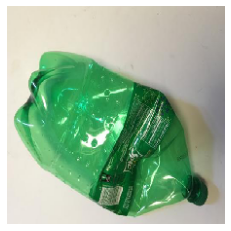

1/1 [==============================] - 1s 1s/step
Your waste material is  plastic  with  87.23  % accuracy


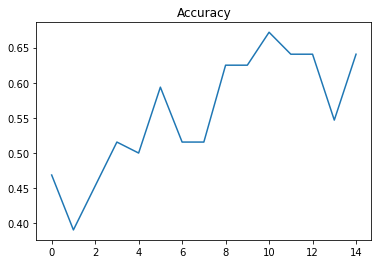

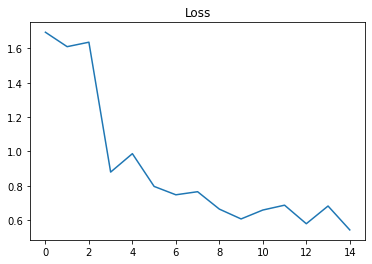

In [ ]:
waste_prediction("plastic472.jpg",new_model)
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()